###1. What is the average rating for each product category?

In [ ]:
import pandas as pd
file_path = '/content/.config/amazon.csv'
amazon_data = pd.read_csv('/content/.config/amazon.csv')

# Ensure 'rating' is numeric
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')

# Extract the first category for simplicity (splitting the 'category' field by '|')
amazon_data['category'] = amazon_data['category'].str.split('|').str[0]

# Calculate the average rating for each main category
average_ratings = amazon_data.groupby('category')['rating'].mean().sort_values(ascending=False).reset_index()

average_ratings.rename(columns={'rating': 'Average Rating'}, inplace=True)
average_ratings

,category,Average Rating
0,OfficeProducts,4.309677
1,Toys&Games,4.300000
2,HomeImprovement,4.250000
3,Computers&Accessories,4.154967
4,Electronics,4.081749
5,Home&Kitchen,4.040716
6,Health&PersonalCare,4.000000
7,MusicalInstruments,3.900000
8,Car&Motorbike,3.800000


###2. What are the top rating_count products by category?

In [ ]:
import pandas as pd
file_path = '/content/.config/amazon.csv'
amazon_data = pd.read_csv('/content/.config/amazon.csv')

# Ensure 'rating_count' is numeric
amazon_data['rating_count'] = amazon_data['rating_count'].str.replace(',', '').astype(float, errors='ignore')

# For each main category, find the product with the highest 'rating_count'
top_rating_count_products = (
    amazon_data.loc[amazon_data.groupby('category')['rating_count'].idxmax()]
    [['category', 'product_name', 'rating_count', 'rating']]
    .sort_values(by='rating_count', ascending=False)
    .reset_index(drop=True)
)

top_rating_count_products.rename(columns={
    'main_category': 'Category',
    'product_name': 'Product Name',
    'rating_count': 'Rating Count',
    'rating': 'Average Rating'
}, inplace=True)

top_rating_count_products


,category,Product Name,Rating Count,Average Rating
0,"Electronics|HomeTheater,TV&Video|Accessories|C...",AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0,4.4
1,"Electronics|Headphones,Earbuds&Accessories|Hea...",boAt Bassheads 100 in Ear Wired Earphones with...,363713.0,4.1
2,Electronics|Mobiles&Accessories|Smartphones&Ba...,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0,4.1
3,Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...,Pigeon Polypropylene Mini Handy and Compact Ch...,270563.0,4.1
4,Computers&Accessories|ExternalDevices&DataStor...,SanDisk Cruzer Blade 32GB USB Flash Drive,253105.0,4.3
...,...,...,...,...
206,Computers&Accessories|Components|InternalHardD...,"Lapster Caddy for ssd and HDD, Optical Bay 2nd...",362.0,4.2
207,Computers&Accessories|Laptops|TraditionalLaptops,"Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6"" ...",323.0,4.0
208,Electronics|Mobiles&Accessories|MobileAccessor...,LAPSTER 12pcs Spiral Cable Protectors for Char...,305.0,4.4
209,Electronics|HomeAudio|Speakers|TowerSpeakers,"KRISONS Thunder Speaker, Multimedia Home Theat...",282.0,3.8


###3. What is the distribution of discounted prices vs. actual prices?

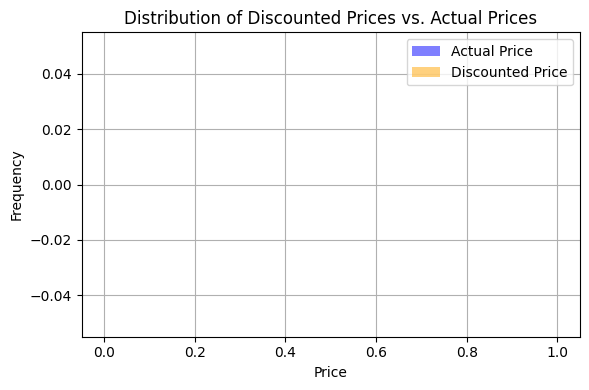

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
file_path = '/content/.config/amazon.csv'
amazon_data = pd.read_csv('/content/.config/amazon.csv')

# Convert 'discounted_price' and 'actual_price' to numeric values
amazon_data['discounted_price'] = pd.to_numeric(amazon_data['discounted_price'], errors='coerce')
amazon_data['actual_price'] = pd.to_numeric(amazon_data['actual_price'], errors='coerce')

# Remove rows with missing or invalid price data
price_data = amazon_data.dropna(subset=['discounted_price', 'actual_price'])

# Plot the distribution of discounted prices vs. actual prices
plt.figure(figsize=(6, 4))
plt.hist(price_data['actual_price'], bins=50, alpha=0.5, label='Actual Price', color='blue')
plt.hist(price_data['discounted_price'], bins=50, alpha=0.5, label='Discounted Price', color='orange')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###5. What are the most popular product names?

In [ ]:
import pandas as pd
file_path = '/content/.config/amazon.csv'
amazon_data = pd.read_csv('/content/.config/amazon.csv')

# Ensure 'rating_count' is numeric for sorting purposes
amazon_data['rating_count'] = pd.to_numeric(amazon_data['rating_count'], errors='coerce')

# Identify the most popular products by sorting based on 'rating_count'
most_popular_products = amazon_data[['product_name', 'rating_count']].dropna().sort_values(
    by='rating_count', ascending=False
).head(10)

most_popular_products.reset_index(drop=True, inplace=True)
most_popular_products.rename(columns={'product_name': 'Product Name', 'rating_count': 'Rating Count'}, inplace=True)

most_popular_products

,Product Name,Rating Count
0,Eureka Forbes car Vac 100 Watts Powerful Sucti...,992.0
1,Eveready Red 1012 AAA Batteries - Pack of 10,989.0
2,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,976.0
3,Zoul USB Type C Fast Charging 3A Nylon Braided...,974.0
4,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0
5,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0
6,Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...,959.0
7,Hindware Atlantic Xceed 5L 3kW Instant Water H...,942.0
8,Crypo™ Universal Remote Compatible with Tata S...,928.0
9,iBELL Castor CTEK15L Premium 1.5 Litre Stainle...,925.0


###6. What are the most popular product keywords?

In [ ]:
from collections import Counter
import string
import pandas as pd
file_path = '/content/.config/amazon.csv'
amazon_data = pd.read_csv('/content/.config/amazon.csv')

# Combine all product names into a single text for processing
all_product_names = " ".join(amazon_data['product_name'].dropna())

# Tokenize: split words, remove punctuation, convert to lowercase
tokens = all_product_names.translate(str.maketrans('', '', string.punctuation)).lower().split()

# Remove common stop words (basic list; extendable if needed)
stop_words = set(['and', 'the', 'with', 'for', 'of', 'in', 'on', 'to', 'a', 'by', 'is', 'at', 'from', 'it', 'as'])
filtered_tokens = [word for word in tokens if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Extract the top 20 most common keywords
most_common_keywords = word_counts.most_common(20)

# Convert to a DataFrame for readability
keywords_df = pd.DataFrame(most_common_keywords, columns=['Keyword', 'Frequency'])
keywords_df

,Keyword,Frequency
0,black,468
1,cable,401
2,usb,390
3,charging,246
4,fast,211
5,c,188
6,smart,172
7,white,155
8,type,149
9,tv,146


###7. What are the most popular product reviews?

In [ ]:
import pandas as pd
file_path = '/content/.config/amazon.csv'
amazon_data = pd.read_csv('/content/.config/amazon.csv')

# Combine all reviews into a single text for analysis
all_reviews = " ".join(amazon_data['review_content'].dropna())

# Tokenize: Split reviews into phrases or individual words (removing punctuation and making lowercase)
review_tokens = all_reviews.translate(str.maketrans('', '', string.punctuation)).lower().split()

# Count frequent phrases or words in reviews
review_counts = Counter(review_tokens)

# Extract the top 20 most common words or short phrases in reviews
most_common_reviews = review_counts.most_common(20)

# Convert to DataFrame for better readability
popular_reviews_df = pd.DataFrame(most_common_reviews, columns=['Review Content', 'Frequency'])
popular_reviews_df


,Review Content,Frequency
0,the,13026
1,is,9899
2,and,9399
3,to,7799
4,it,7022
5,for,6488
6,a,6024
7,i,5553
8,of,4537
9,this,4438


###8. What is the correlation between discounted_price and rating?

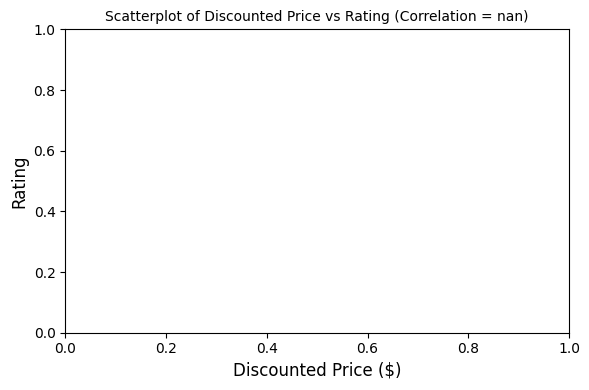

nan

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
file_path = '/content/.config/amazon.csv'
amazon_data = pd.read_csv('/content/.config/amazon.csv')

# Ensure 'discounted_price' and 'rating' are numeric and handle missing values
price_rating_data = amazon_data[['discounted_price', 'rating']].dropna()
price_rating_data['discounted_price'] = pd.to_numeric(price_rating_data['discounted_price'], errors='coerce')
price_rating_data['rating'] = pd.to_numeric(price_rating_data['rating'], errors='coerce')

# Drop any remaining rows with missing or invalid data
price_rating_data = price_rating_data.dropna()

# Calculate the Pearson correlation coefficient
correlation = price_rating_data['discounted_price'].corr(price_rating_data['rating'])

# Visualize the relationship with a scatterplot
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='discounted_price',
    y='rating',
    data=price_rating_data,
    alpha=0.5,
    color="blue"
)
plt.title(f"Scatterplot of Discounted Price vs Rating (Correlation = {correlation:.2f})", fontsize=10)
plt.xlabel("Discounted Price ($)", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.tight_layout()
plt.show()

correlation

###9. What are the Top 5 categories based on the highest ratings?

In [ ]:
import pandas as pd
file_path = '/content/.config/amazon.csv'
amazon_data = pd.read_csv('/content/.config/amazon.csv')

# Convert 'rating' column to numeric before grouping
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')

# Calculate the average rating for each category
average_rating_by_category = (
    amazon_data.groupby('category')['rating']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

average_rating_by_category.rename(columns={'main_category': 'Category', 'rating': 'Average Rating'}, inplace=True)
average_rating_by_category


,category,Average Rating
0,Computers&Accessories|Tablets,4.6
1,Computers&Accessories|NetworkingDevices|Networ...,4.5
2,Electronics|Cameras&Photography|Accessories|Film,4.5
3,Electronics|HomeAudio|MediaStreamingDevices|St...,4.5
4,OfficeProducts|OfficeElectronics|Calculators|B...,4.5


###10. Identify any potential areas for improvement or optimization based on the data analysis?

1. Product Ratings and Customer Satisfaction
Low-performing categories: Categories like Car&Motorbike and MusicalInstruments have lower average ratings compared to others.
Actionable Steps:
Collect customer feedback to identify issues (e.g., quality, usability).
Focus on improving product offerings or customer service in these categories.
2. Discount Strategy
Category discount patterns: If certain categories (e.g., Electronics) offer consistent discounts but have only average ratings, there might be a disconnect between pricing strategy and perceived value.
Actionable Steps:
Analyze whether discounts lead to better customer satisfaction or sales in these categories.
Consider offering targeted promotions or bundling for underperforming categories.
3. Regional Sales Insights
If regional trends indicate certain areas have lower sales or satisfaction, consider region-specific promotions, tailored product mixes, or improved delivery options.
4. Seasonal Trends in Sales
If sales data over time indicates significant seasonal trends, align marketing campaigns and stock availability to match peak demand periods.
Actionable Steps:
Increase promotions or discounts during high-demand seasons.
Prepare inventory for potential high-demand items in advance.
5. Price Optimization
Price vs. income analysis: Ensure pricing aligns with the target audience’s annual income bracket. If higher-priced items perform poorly in lower-income brackets, consider:
Offering lower-priced alternatives.
Introducing flexible payment options like installment plans.
6. Product Diversity
Highly rated categories (OfficeProducts, Toys&Games): Leverage the popularity of these categories by:
Introducing complementary products.
Highlighting top-performing items in marketing campaigns.
7. Addressing Data Gaps
Missing or inconsistent data: Issues with missing or invalid data (e.g., Primary_Category, actual_price, or discounted_price) hinder insights.
Actionable Steps:
Implement better data validation processes during collection.
Ensure mandatory fields like pricing and ratings are consistently recorded.
8. Customer Segmentation
Gender and income preferences: Tailor marketing campaigns for different demographics based on their preferences and spending capacity.
